In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
def get_preprocessed_data(images, labels):
    
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print('train images shape: ', tr_images.shape)
print('train labels shape: ', tr_labels.shape)
print('validation images shape: ', val_images.shape)
print('validation labels shape: ', val_labels.shape)

tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('After one hot encoding, train labels shape: ', tr_oh_labels.shape)
print('After one hot encoding, validation labels shape: ', val_oh_labels.shape)

train images shape:  (51000, 28, 28)
train labels shape:  (51000,)
validation images shape:  (9000, 28, 28)
validation labels shape:  (9000,)
After one hot encoding, train labels shape:  (51000, 10)
After one hot encoding, validation labels shape:  (9000, 10)


In [5]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M1


2021-08-12 14:47:31.920924: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-12 14:47:31.921091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, 
                   validation_data=(val_images, val_oh_labels),
                   epochs=20, verbose=1)

2021-08-12 14:48:44.843100: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-12 14:48:44.843710: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-12 14:48:44.982685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
394/399 [============================>.] - ETA: 0s - loss: 0.5910 - accuracy: 0.7975

2021-08-12 14:48:47.699176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: 0.5894 - accuracy: 0.7980 - val_loss: 0.4857 - val_accuracy: 0.8231
Epoch 2/20
399/399 [==============================] - 2s 6ms/step - loss: 0.4116 - accuracy: 0.8546 - val_loss: 0.4348 - val_accuracy: 0.8451
Epoch 3/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3746 - accuracy: 0.8664 - val_loss: 0.3812 - val_accuracy: 0.8640
Epoch 4/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3486 - accuracy: 0.8755 - val_loss: 0.3847 - val_accuracy: 0.8626
Epoch 5/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3261 - accuracy: 0.8834 - val_loss: 0.3627 - val_accuracy: 0.8711
Epoch 6/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3116 - accuracy: 0.8873 - val_loss: 0.3632 - val_accuracy: 0.8700
Epoch 7/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3011 - accuracy: 0.8912 - val_loss: 0.3346 - val_accuracy: 0.8809
Epoch 8/20
399/39

In [8]:
print('train loss: ', history.history['loss'])
print()
print('train accuracy: ', history.history['accuracy'])
print()
print('validatioin loss: ', history.history['val_loss'])
print()
print('validation accuracy: ', history.history['val_accuracy'])

train loss:  [0.5894199013710022, 0.4115772247314453, 0.3746202886104584, 0.3486291170120239, 0.32610735297203064, 0.3115675449371338, 0.3010587990283966, 0.28907883167266846, 0.2777014374732971, 0.2672797739505768, 0.260654479265213, 0.2541963458061218, 0.24686309695243835, 0.2427678257226944, 0.23639336228370667, 0.22694051265716553, 0.22232592105865479, 0.22013798356056213, 0.21319790184497833, 0.20728032290935516]

train accuracy:  [0.7980000376701355, 0.854607880115509, 0.8663725852966309, 0.8754901885986328, 0.8833921551704407, 0.887333333492279, 0.8911764621734619, 0.8934705853462219, 0.8987255096435547, 0.901941180229187, 0.904941201210022, 0.9055686593055725, 0.9088823795318604, 0.9096274971961975, 0.911450982093811, 0.9166274666786194, 0.9183529615402222, 0.9173333644866943, 0.9207255244255066, 0.9230392575263977]

validatioin loss:  [0.4856874644756317, 0.4347980320453644, 0.3811899721622467, 0.3846784234046936, 0.3627260625362396, 0.36321747303009033, 0.3346087336540222, 0.

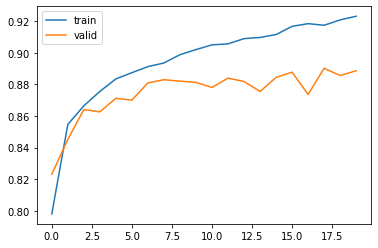

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()